In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import sklearn as sk
import numpy as np
import os
import random

# SEED all random generators
seed = 4
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)

# ==============================================================================
# Chart variables
# ==============================================================================
titlesize = 16
subtitlesize = 14
labelsize = 14
axessize = 12
legendsize = 11
markersize = 5

# http://scipy-cookbook.readthedocs.io/items/Matplotlib_LaTeX_Examples.html
plt.rcParams.update(plt.rcParamsDefault)
# plt.style.use('grayscale')
# plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
font = font_manager.FontProperties(family='serif', size=legendsize)

# Markers - https://matplotlib.org/api/markers_api.html
markers = ["v", "^", "<", ">", "8", "s", "p", "P", "*", "+", "X", "D", "o", "s"]
linestyle_tuple = [
     ('solid', 'solid'),      # Same as (0, ()) or '-'
     ('dotted', 'dotted'),    # Same as (0, (1, 1)) or ':'
     ('dashed', 'dashed'),    # Same as '--'
     ('dashdot', 'dashdot')]  # Same as '-.'

linestyle_tuple2 = [
#      ('loosely dotted',        (0, (1, 10))),
     ('dotted',                (0, (1, 1))),
     ('densely dotted',        (0, (1, 1))),

#      ('loosely dashed',        (0, (5, 10))),
     ('dashed',                (0, (5, 5))),
     ('densely dashed',        (0, (5, 1))),

#      ('loosely dashdotted',    (0, (3, 10, 1, 10))),
     ('dashdotted',            (0, (3, 5, 1, 5))),
     ('densely dashdotted',    (0, (3, 1, 1, 1))),

     ('dashdotdotted',         (0, (3, 5, 1, 5, 1, 5))),
#      ('loosely dashdotdotted', (0, (3, 10, 1, 10, 1, 10))),
     ('densely dashdotdotted', (0, (3, 1, 1, 1, 1, 1)))]
greyscale = ['silver', 'grey', 'lightgrey', 'black']
# Lines - https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html

In [2]:
df = pd.read_csv('../../../resources/intention/explain_time.csv')
df2 = pd.read_csv('../../../resources/intention/explain_time_python.csv')
df = df.merge(df2, on=["execution_id"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cardinality           180 non-null    int64  
 1   execution_id          180 non-null    object 
 2   executionplan         180 non-null    object 
 3   intention             180 non-null    object 
 4   intention_characters  180 non-null    int64  
 5   query_bytes           180 non-null    float64
 6   query_characters      180 non-null    float64
 7   query_cost            180 non-null    float64
 8   query_rows            180 non-null    float64
 9   time_model            180 non-null    int64  
 10  time_query            180 non-null    int64  
 11  model                 180 non-null    object 
 12  time_model_python     180 non-null    int64  
dtypes: float64(4), int64(5), object(4)
memory usage: 19.7+ KB


In [3]:
gdf = df.groupby(by=["cardinality", "model"])[["time_model_python", "time_query", "intention_characters", "query_characters"]].mean().reset_index()
gdf["time_query"] = (gdf["time_query"] / 1000).apply(lambda x: round(x, 2))
gdf["time_model_python"] = (gdf["time_model_python"] / 1000).apply(lambda x: round(x, 2))
gdf["query_characters"] = gdf["query_characters"].apply(lambda x: int(x))
gdf["intention_characters"] = gdf["intention_characters"].apply(lambda x: int(x))
gdf["Time total"] = gdf["time_model_python"] + gdf["time_query"]
gdf = gdf.rename({"cardinality": "$|C|$", "time_query": "Time query", "time_model_python": "Time model", "query_characters": "Query", "intention_characters": "Intention"}, axis=1)
gdf = gdf.reindex(sorted(gdf.columns), axis=1)
gdf

,$|C|$,Intention,Query,Time model,Time query,Time total,model
0,36,132,397,0.00,0.04,0.04,CrossCorrelation
1,36,132,397,0.01,0.04,0.05,Multireg
2,36,132,397,0.01,0.04,0.05,Polyfit
3,323,115,265,0.01,0.03,0.04,CrossCorrelation
4,323,115,265,0.01,0.03,0.04,Multireg
5,323,115,265,0.01,0.03,0.04,Polyfit
6,540,134,403,0.01,0.05,0.06,CrossCorrelation
7,540,134,403,0.01,0.05,0.06,Multireg
8,540,134,403,0.01,0.05,0.06,Polyfit
9,1224,137,412,0.01,0.06,0.07,CrossCorrelation


In [4]:
gdf2 = gdf.pivot(index=["$|C|$", "Intention", "Query", "Time query"], columns=["model"], values=["Time model"])
gdf2.columns = gdf2.columns.droplevel(0)
gdf2 = gdf2.reset_index().rename_axis(None, axis=1)
gdf2

,$|C|$,Intention,Query,Time query,CrossCorrelation,Multireg,Polyfit
0,36,132,397,0.04,0.00,0.01,0.01
1,323,115,265,0.03,0.01,0.01,0.01
2,540,134,403,0.05,0.01,0.01,0.01
3,1224,137,412,0.06,0.01,0.01,0.01
4,12113,133,400,0.05,0.08,0.02,0.02
5,16949,129,395,0.07,0.10,0.02,0.03
6,18492,128,385,0.06,0.10,0.02,0.03
7,20525,128,392,0.07,0.11,0.02,0.03
8,77832,127,382,0.08,0.36,0.05,0.09
9,86832,140,509,0.09,0.40,0.05,0.10


In [5]:
print(gdf2.to_latex(index=False, escape=False))

\begin{tabular}{rrrrrrr}
\toprule
 $|C|$ &  Intention &  Query &  Time query &  CrossCorrelation &  Multireg &  Polyfit \\
\midrule
    36 &        132 &    397 &        0.04 &              0.00 &      0.01 &     0.01 \\
   323 &        115 &    265 &        0.03 &              0.01 &      0.01 &     0.01 \\
   540 &        134 &    403 &        0.05 &              0.01 &      0.01 &     0.01 \\
  1224 &        137 &    412 &        0.06 &              0.01 &      0.01 &     0.01 \\
 12113 &        133 &    400 &        0.05 &              0.08 &      0.02 &     0.02 \\
 16949 &        129 &    395 &        0.07 &              0.10 &      0.02 &     0.03 \\
 18492 &        128 &    385 &        0.06 &              0.10 &      0.02 &     0.03 \\
 20525 &        128 &    392 &        0.07 &              0.11 &      0.02 &     0.03 \\
 77832 &        127 &    382 &        0.08 &              0.36 &      0.05 &     0.09 \\
 86832 &        140 &    509 &        0.09 &              0.40 &   

/tmp/ipykernel_309560/1564807471.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(gdf2.to_latex(index=False, escape=False))


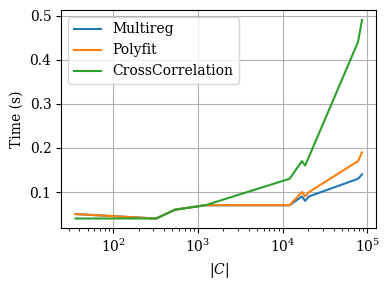

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
for model in ["Multireg", "Polyfit", "CrossCorrelation"]:
    gdf[gdf["model"] == model].plot(x='$|C|$', y='Time total', ax=ax, label=model)
ax.set_xscale('log')
ax.set_ylabel('Time (s)')
ax.set_xlabel('$|C|$')
ax.grid(True)
fig.tight_layout()

In [ ]:
((gdf["Query"] - gdf["Intention"]) / gdf["Query"]).mean()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
df3 = pd.read_csv('../../../resources/intention/explain_scalability_python.csv')
df3["time_model_python"] = df3["time_model_python"] / 1000
for model, group in df3.groupby(["model"]):
    group.reset_index().groupby(["measures"]).mean().reset_index().plot(ax=ax, label=model, x='measures', y='time_model_python')
ax.set_ylabel('Time (sec)')
ax.set_xlabel('$|M| - 1$')
ax.set_xticks([x for x in range(1, 10)])
ax.grid(True)
fig.tight_layout()
fig.savefig('../../../resources/intention/scalability.pdf')
fig.savefig('../../../resources/intention/scalability.svg')